# HR-Analysis: Predicting Job-Seeker
An analytical model to assist LinkedIn in *****

<br>

**Goal:**
- obtain important features for predicting job-changer
- the best model that automatically predict job-changer (>80% accuracy rate) 

**Dataset:**
- shuffled_encoded.csv

**Models:**
1. CART
2. Random Forest
3. SVN
4. xgboost

**PipeLine:**
1. `Train-test split`
2. Train on dataset (4 models)
3. Final model `evaluation` with test dataset

**Model Explainer:**
- `SHapley Additive exPlanations (SHAP)` is employed to explain predictions of the random forest model for both individual record data and the weighted overall importance of each variable.
- Hence, each data record can be well explained using SHAP algorithm, which provides a qualitative understanding between the input variables and the response to facilitate understanding and decision-making.

<br>

<hr>



## 1. Pre-modelling preparations

- Install dependencies
- Import libraries and dataset
- Train-test split + SMOTE
- Evaluation metrics

In [1]:
# import basic libraries
import numpy as np 
import pandas as pd 
import os
import warnings
warnings.filterwarnings("ignore")        
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import squarify
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


import seaborn as sb 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv('archive/shuffled_encoded.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18237 entries, 0 to 18236
Columns: 155 entries, city_development_index to company_type_Unknown
dtypes: float64(151), int64(4)
memory usage: 21.6 MB


In [3]:
data.head()

,city_development_index,experience,company_size,last_new_job,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown
0,0.924,11,0,1,8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.804,17,3,1,57,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.920,11,3,1,32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.920,9,0,1,168,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.893,20,6,2,47,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
df1 = data.pop('target') # remove column of predictor and store it in df1
data['target']=df1 # add back to the last column
data.head()

,city_development_index,experience,company_size,last_new_job,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,...,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown,target
0,0.924,11,0,1,8,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.804,17,3,1,57,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.920,11,3,1,32,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.920,9,0,1,168,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.893,20,6,2,47,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
data['target'].value_counts()

0.0    13731
1.0     4506
Name: target, dtype: int64

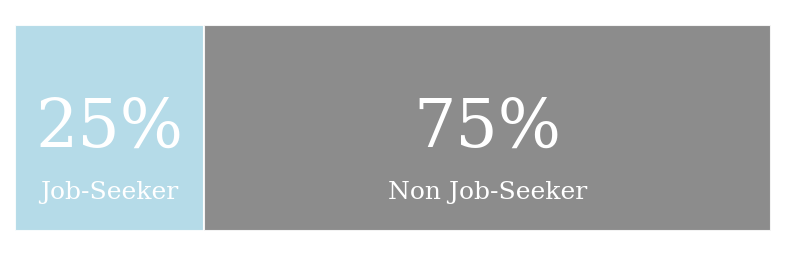

In [6]:
x=data.groupby(['target'])['target'].count()
y=len(data)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)

ax.barh(ratio.index, ratio[1.0], color='lightblue', alpha=0.9, ec="white", label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec="white", label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


#### 1.2 Train-Test Split

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#First normalize the data

X = StandardScaler().fit_transform(data.iloc[:,:-1])

X = data.loc[:, data.columns != 'target']
y = data.loc[:, data.columns == 'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (12765, 154)
y_train shape: (12765, 1)
X_test shape: (5472, 154)


#### 1.3 Oversampling SMOTE
- Oversampling on trainset

In [8]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train_os, y_train_os = os.fit_resample(X_train, y_train)
X_train_os = pd.DataFrame(data = X_train_os, columns = X.columns)
y_train_os = pd.DataFrame(data = y_train_os, columns = y.columns)


# check the oversampled data (train)
print("===== Oversampled data =====")

num_of_job_seeker = len(y_train_os[y_train_os['target'] == 1])
num_of_no_job_seeker = len(y_train_os[y_train_os['target'] == 0])
num_rows = len(X_train_os)

print("Total number of rows:", num_rows)
print("Number of target == 0 rows:", num_of_no_job_seeker)
print("Number of target == 1 rows:", num_of_job_seeker)

print("Proportion of target == 0:", num_of_no_job_seeker/num_rows)
print("Proportion of target == 1:", num_of_job_seeker/num_rows)

===== Oversampled data =====
Total number of rows: 19228
Number of target == 0 rows: 9614
Number of target == 1 rows: 9614
Proportion of target == 0: 0.5
Proportion of target == 1: 0.5


#### 1.4 Metrics to Measure Performance
- Classification Accuracy (5-fold cross validation with roc-auc-score)
- Confusion Matrix with true positive rate and false negative rate
- Precision, Recall, and F-score
- Out-of-bag (oob) score (for random forest)
- ROC AUC Curve score

<br>

**Why ROC AUC Score instead of overall accuracy for the 5-fold cross validation score (we will term it as classification accuracy for eaiser understanding for business stakeholders)?**
- We care equally about true positive and true negative classes
- AUC calibrates the trade-off between sensitivity and specificity at the best-chosen threshold
- While overall accuracy measures how well a single model is doing, AUC compares two models as well as evaluates the same model's performance across different thresholds

<br>

**Reference:**
- https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc
- https://www.kdnuggets.com/2022/10/metric-accuracy-auc.html
- https://github.com/ztjhz/SC1015-Project/blob/main/Anime/classification.ipynb (done by Jing Qiang from SC1015 module 🐱‍👤)

In [9]:
# Confusion Matrix
def confusion_matrix_TPR_TNR(y, y_pred, scores, train_test_string):
    from sklearn.metrics import confusion_matrix
    
    # Confusion Matrix
    c_matrix = confusion_matrix(y, y_pred)

    # True Negatives & True Positives
    TN = c_matrix[0][0]
    FP = c_matrix[1][0]
    FN = c_matrix[0][1]
    TP = c_matrix[1][1]

    # True Positive Rate, True Negative Rate, False Positive Rate, False Negative Rate
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(TN+FP)
    FNR = FN/(TP+FN)

    # Check the Goodness of Fit (on Train Data)
    print(f"Goodness of Fit of Model ({train_test_string} Dataset)")
    print("Classification Accuracy:", scores.mean())
    print("True Positive Rate:", TPR)
    print("True Negative Rate:", TNR)
    print("False Postive Rate:", FPR)
    print("False Negative Rate:", FNR)

    # Plot the Confusion Matrix
    plt.figure(figsize=(6, 6))
    sb.heatmap(c_matrix, 
               annot = True, 
               fmt=".0f", 
               annot_kws={"size": 18}).set(title=f"Confusion Matrix ({train_test_string} Dataset)")
    print()

In [10]:
# Precision and Recall
def get_precision_recall(y, y_pred):
    from sklearn.metrics import precision_score, recall_score
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    
    return [precision, recall]

# F-score
def get_f1_score(y, y_pred):
    from sklearn.metrics import f1_score
    
    f1 = f1_score(y, y_pred)
    
    print("f1_score:", f1)
    
    return f1

In [11]:
# Out-of-bag (oob) score
def get_oob_score(random_forest):
    print("oob score:", round(random_forest.oob_score_ * 100, 2), "%")

In [12]:
# ROC AUC Curve score
def ROC_AUC(random_forest, X_train, y_train, train_test):
    try:
        # getting the probabilities of our predictions
        y_scores = random_forest.predict_proba(X_train)
        y_scores = y_scores[:,1]

        from sklearn.metrics import roc_curve
        # compute true positive rate and false positive rate
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

        # plotting them against each other
        def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
            plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
            plt.plot([0, 1], [0, 1], 'r', linewidth=4)
            plt.axis([0, 1, 0, 1])
            plt.xlabel('False Positive Rate (FPR)', fontsize=16)
            plt.ylabel('True Positive Rate (TPR)', fontsize=16)
            plt.title(f'{train_test} Dataset')

        plt.figure(figsize=(14, 7))
        plot_roc_curve(false_positive_rate, true_positive_rate)
        plt.show()


        # ROC AUC Score
        from sklearn.metrics import roc_auc_score
        r_a_score = roc_auc_score(y_train, y_scores)
        print("ROC-AUC-Score:", r_a_score)
    except:
        pass

**Function that evaluates a classifier model's performance based on various metrics**
- Cross Validation prediction (CV=5)

In [13]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [14]:
def model_performance(classifier_model, X_train, X_test, y_train, y_test):
    #Predict values based on new parameters
    
    y_train_pred = classifier_model.predict(X_train)
    y_test_pred = classifier_model.predict(X_test)

    train_scores = accuracy_score(y_train, y_train_pred)
    test_scores = accuracy_score(y_test, y_test_pred)
    # Performance metrics

    print("-> Train Dataset")
    confusion_matrix_TPR_TNR(y_train, y_train_pred, train_scores, "Train")
    get_precision_recall(y_train, y_train_pred)
    get_f1_score(y_train, y_train_pred)

    print("\n\n-----\n-> Test Dataset")
    confusion_matrix_TPR_TNR(y_test, y_test_pred, test_scores, "Test")
    get_precision_recall(y_test, y_test_pred)
    get_f1_score(y_test, y_test_pred)
    ROC_AUC(classifier_model, X_test, y_test, "Test")
    print('-----\n')
    

## 2. Feature Selection 
- Select based on Multi-model feature score weighted screening
1. decision tree
2. random forest 
3. Extra trees (not sure)
4. GradientBoostingClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

N = 2
oob = 0
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=data.columns[:-1])

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

model_list = [DecisionTreeClassifier(),
              ExtraTreesClassifier(),
              RandomForestClassifier(n_estimators=10,max_depth=5),
              GradientBoostingClassifier()
             ]
model_name_list = ['CART','ETC','RF','GBC']
for j,model_name in enumerate(model_name_list):
    
    leaderboard_model = model_list[j]
    
    for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
        # Fitting the model
        leaderboard_model.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        importances.iloc[:, fold - 1] = leaderboard_model.feature_importances_
        importances[model_name] = np.mean(importances[['Fold_{}'.format(i) for i in range(1, N + 1)]],axis = 1)
        #importances.drop([['Fold_{}'.format(i) for i in range(1, N + 1)]])
        
importances = importances.iloc[:,2:]

In [16]:
## Take the average, and then use the top 12 as the final choice.
importances['Mean_Importance'] = importances.mean(axis=1)
selected_index = np.argsort(importances['Mean_Importance'].values.reshape(-1))[::-1][:12]

In [17]:
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)
importances

,CART,ETC,RF,GBC,Mean_Importance
city_development_index,0.173166,0.062667,0.239486,0.478594,0.238478
company_size,0.116545,0.082338,0.118663,0.246445,0.140998
training_hours,0.189723,0.160350,0.008182,0.020886,0.094785
experience,0.120295,0.122833,0.037766,0.023415,0.076077
city_city_21,0.002837,0.068317,0.117899,0.003747,0.048200
...,...,...,...,...,...
city_city_62,0.000000,0.000041,0.000000,0.000000,0.000010
city_city_82,0.000000,0.000024,0.000000,0.000000,0.000006
city_city_166,0.000000,0.000014,0.000000,0.000000,0.000004
city_city_18,0.000000,0.000008,0.000000,0.000000,0.000002


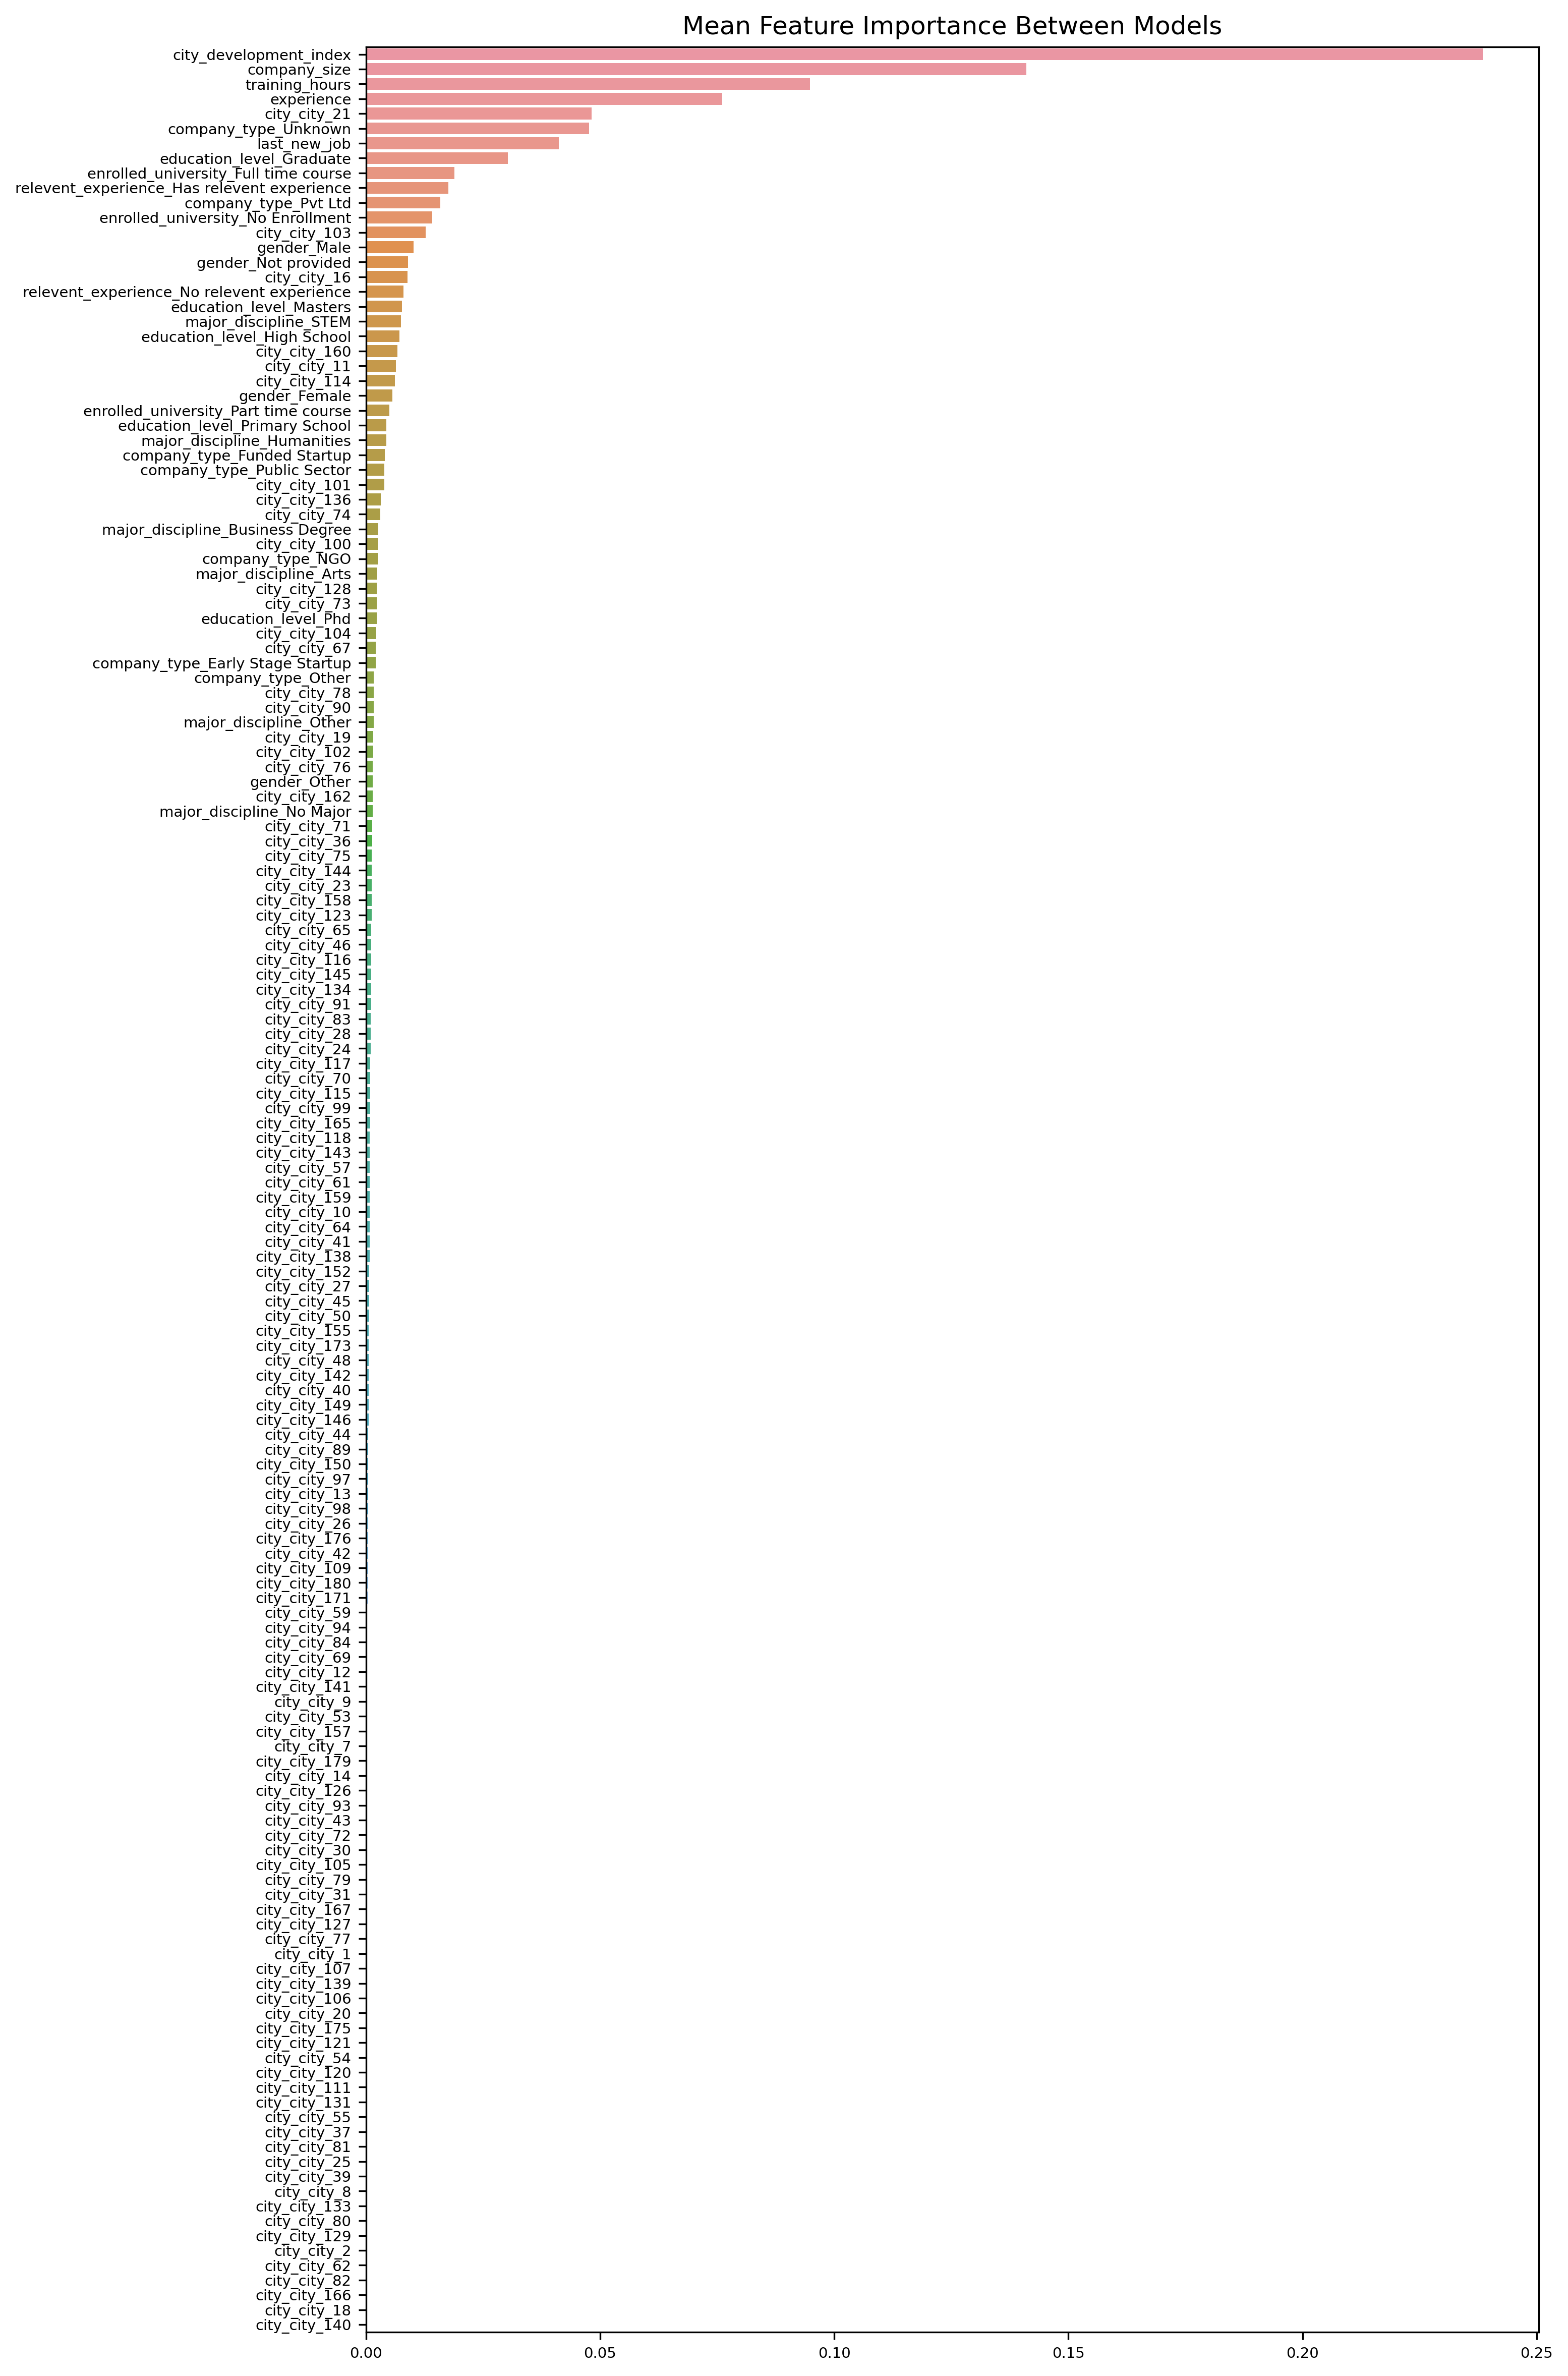

In [18]:
## Based on the model results, we can calculate the contribution of each feature and visualize it as shown below, 
# the longer the horizontal bar, the more valuable the feature is.
plt.figure(figsize=(10, 20), dpi =300)
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)
plt.title('Mean Feature Importance Between Models', size=12)

plt.show()

In [19]:
# Save Selected Features
selected_columns = importances.index[:8]
print(selected_columns)

Index(['city_development_index', 'company_size', 'training_hours',
       'experience', 'city_city_21', 'company_type_Unknown', 'last_new_job',
       'education_level_Graduate'],
      dtype='object')


<hr>

## 3. Modelling 
- Models run on full dataset
- Models run on selected features
- Models run on selected features & tuning 


### 3.1 CART - Classification Tree

**Why CART?**

**References:**
- https://towardsdatascience.com/cart-classification-and-regression-trees-for-clean-but-powerful-models-cc89e60b7a85
- https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752

### CART 1 - Basic

In [20]:
# Decision Tree using Train Data
dectree_m1 = DecisionTreeClassifier(random_state=0)  # create the decision tree object
dectree_m1.fit(X_train_os, y_train_os)       # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree_m1.predict(X_train_os)
y_test_pred = dectree_m1.predict(X_test)

-> Train Dataset
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.9993239026419805
True Positive Rate: 1.0
True Negative Rate: 0.9986496312454555
False Postive Rate: 0.0013503687545445102
False Negative Rate: 0.0

Precision: 1.0
Recall: 0.9986478052839609
f1_score: 0.9993234452250845


-----
-> Test Dataset
Goodness of Fit of Model (Test Dataset)
Classification Accuracy: 0.7174707602339181
True Positive Rate: 0.4328882642304989
True Negative Rate: 0.8174857989627068
False Postive Rate: 0.18251420103729316
False Negative Rate: 0.567111735769501

Precision: 0.4328882642304989
Recall: 0.45461254612546126
f1_score: 0.4434845212383009


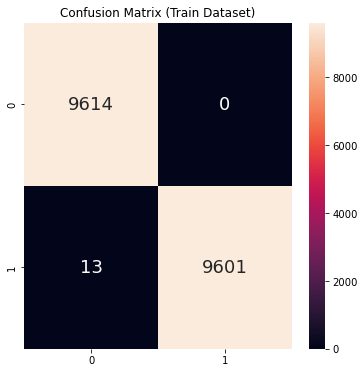

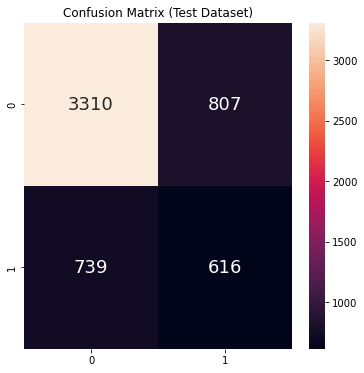

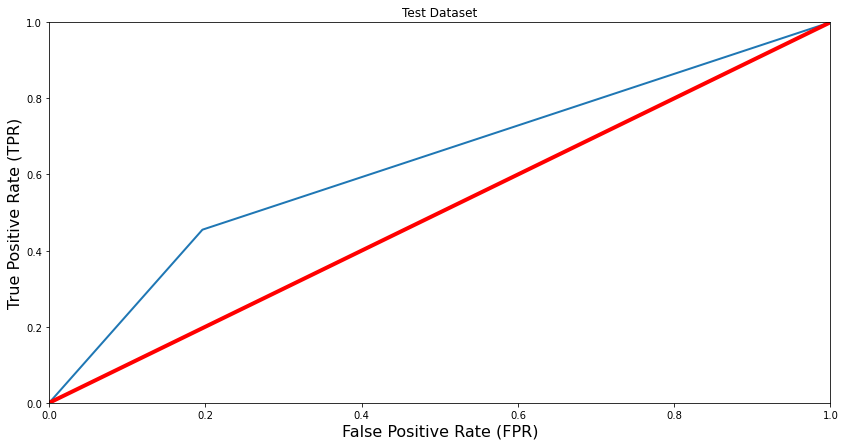

ROC-AUC-Score: 0.629395979410365
-----



In [21]:
model_performance(dectree_m1, X_train_os, X_test, y_train_os, y_test)

### CART 2 - Model Tuning

**GridSearchCV**

In [22]:
# RFC Parameters tunning 
dectree_m2 = DecisionTreeClassifier()

In [23]:
# On all dataset 

## Search grid for optimal parameters
cart_param_grid = {"max_depth": [3,5],
              "max_features": [3,5]}

gsCART = GridSearchCV(dectree_m2,param_grid = cart_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsCART.fit(X_train_os, y_train_os)

CART_best = gsCART.best_estimator_

# Best score
gsCART.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


0.6718337529339926

-> Train Dataset
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.7027251924277096
True Positive Rate: 0.823969414893617
True Negative Rate: 0.647517408416591
False Postive Rate: 0.352482591583409
False Negative Rate: 0.17603058510638298

Precision: 0.823969414893617
Recall: 0.5156022467235282
f1_score: 0.6342930262316058


-----
-> Test Dataset
Goodness of Fit of Model (Test Dataset)
Classification Accuracy: 0.7637061403508771
True Positive Rate: 0.53125
True Negative Rate: 0.8151785714285714
False Postive Rate: 0.18482142857142858
False Negative Rate: 0.46875

Precision: 0.53125
Recall: 0.388929889298893
f1_score: 0.4490839369407755


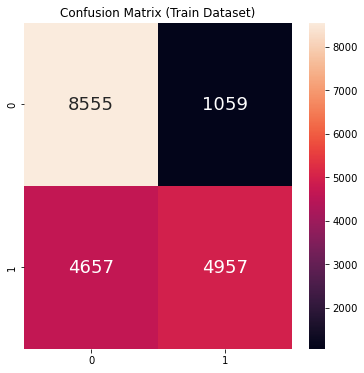

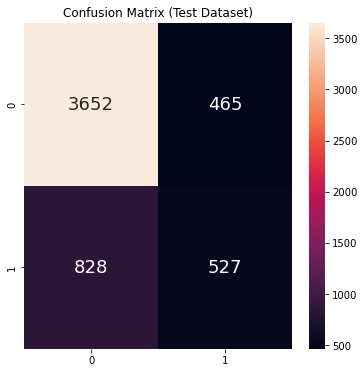

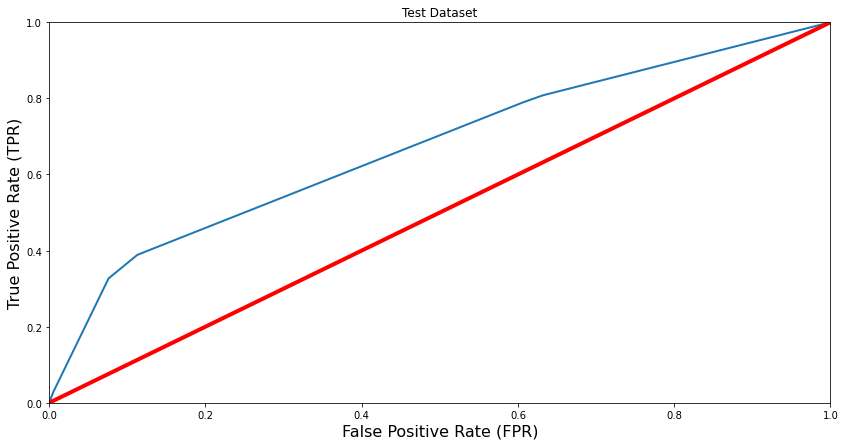

ROC-AUC-Score: 0.6697373055829174
-----



In [24]:
model_performance(gsCART, X_train_os, X_test, y_train_os, y_test)

In [25]:
# On selected features

# RFC Parameters tunning 
CART = DecisionTreeClassifier()

## Search grid for optimal parameters
cart_param_grid = {"max_depth": [3,5],
              "max_features": [3,5]}


gsCART_2 = GridSearchCV(CART,param_grid = cart_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsCART_2.fit(X_train_os.iloc[:,selected_index],y_train_os)

CART_best = gsCART_2.best_estimator_

# Best score
gsCART_2.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


0.8058584231535711

-> Train Dataset
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.8055960058248388
True Positive Rate: 0.8208824814329402
True Negative Rate: 0.7916997617156474
False Postive Rate: 0.20830023828435265
False Negative Rate: 0.17911751856705985

Precision: 0.8208824814329402
Recall: 0.7817765758269191
f1_score: 0.8008524240809803


-----
-> Test Dataset
Goodness of Fit of Model (Test Dataset)
Classification Accuracy: 0.7763157894736842
True Positive Rate: 0.5396249243799153
True Negative Rate: 0.878764074365017
False Postive Rate: 0.12123592563498298
False Negative Rate: 0.4603750756200847

Precision: 0.5396249243799153
Recall: 0.6583025830258302
f1_score: 0.5930851063829787


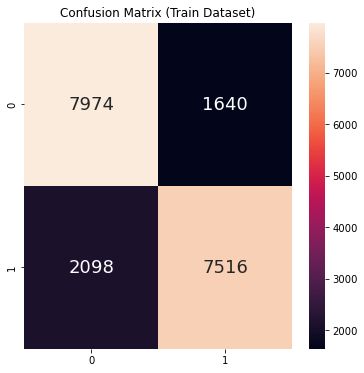

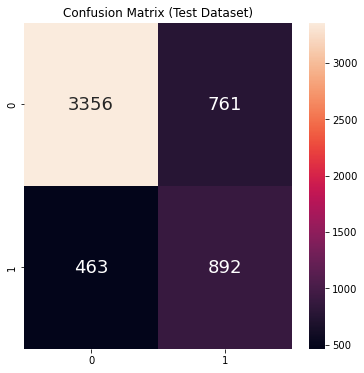

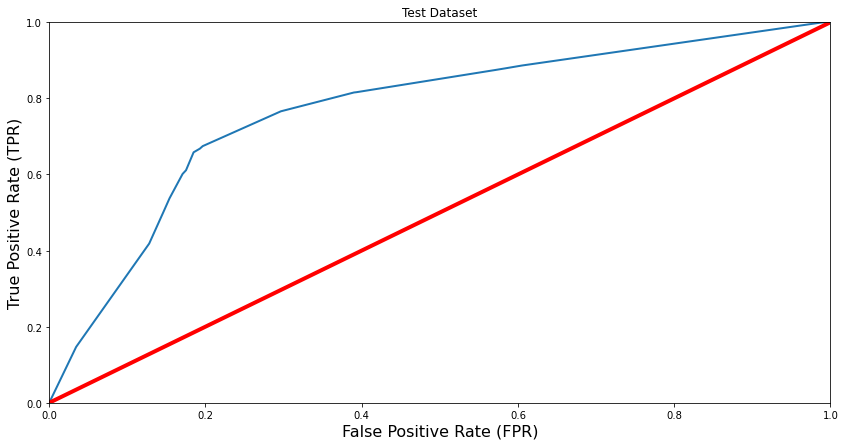

ROC-AUC-Score: 0.7693999410239427
-----



In [26]:
model_performance(gsCART_2, X_train_os.iloc[:,selected_index], X_test.iloc[:,selected_index], y_train_os, y_test)

#### RF

In [ ]:
# On all dataset 

# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [3,5],
              "min_samples_split": [2, 4, 10, 12, 16, 18, 25, 35],
              "min_samples_leaf": [1, 5, 10, 25, 50, 70],
              "bootstrap": [False],
              "n_estimators" :[200, 500, 600, 800],
              "criterion": ["gini"]}


gsRFC_1 = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC_1.fit(X_train_os,y_train_os)

RFC_best = gsRFC_1.best_estimator_

# Best score
gsRFC_1.best_score_

In [ ]:
model_performance(gsRFC_1, X_train_os, X_test, y_train_os, y_test)

In [ ]:
# On selected features

# RFC Parameters tunning 
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "max_features": [3,5],
              "min_samples_split": [2, 4, 10, 12, 16, 18, 25, 35],
              "min_samples_leaf": [1, 5, 10, 25, 50, 70],
              "bootstrap": [False],
              "n_estimators" :[200, 500, 600, 800],
              "criterion": ["gini"]}



gsRFC_2 = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC_2.fit(X_train_os.iloc[:,selected_index],y_train_os)

RFC_best = gsRFC_2.best_estimator_

# Best score
gsRFC_2.best_score_

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686:

In [ ]:
model_performance(gsRFC_2, X_train_os.iloc[:,selected_index], X_test.iloc[:,selected_index], y_train_os, y_test)

#### SVC

In [ ]:
# On all features

### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.01],
                  'C': [1]}

gsSVMC_1 = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC_1.fit(X_train_os,y_train_os)

SVMC_best = gsSVMC_1.best_estimator_

# Best score
gsSVMC_1.best_score_

In [ ]:
model_performance(gsSVMC_1, X_train_os, X_test, y_train_os, y_test)

In [ ]:
# On selected features

### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.01],
                  'C': [1]}

gsSVMC_2 = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC_2.fit(X_train_os.iloc[:,selected_index],y_train_os)

SVMC_best = gsSVMC_2.best_estimator_

# Best score
gsSVMC_2.best_score_

In [ ]:
model_performance(gsSVMC_2, X_train_os.iloc[:,selected_index], X_test.iloc[:,selected_index], y_train_os, y_test)

<hr>

### xgboost

In [ ]:
xgbc = XGBClassifier(use_label_encoder=False)
xgbc.get_params().keys()

In [ ]:
### xgbc classifier
### on all dataset
xgbc = XGBClassifier(use_label_encoder=False)
xgbc_param_grid = {'gamma': [0.01]}

gsXGBC_1 = GridSearchCV(xgbc,param_grid = xgbc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGBC_1.fit(X_train_os,y_train_os)

XGBC_best = gsXGBC_1.best_estimator_

# Best score
gsXGBC_1.best_score_

In [ ]:
model_performance(gsXGBC_1, X_train_os, X_test, y_train_os, y_test)

In [ ]:
### SVC classifier
### on selected dataset

xgbc = XGBClassifier(use_label_encoder=False)
xgbc_param_grid = {'gamma': [0.01]}

gsXGBC_2 = GridSearchCV(xgbc,param_grid = xgbc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGBC_2.fit(X_train_os.iloc[:,selected_index],y_train_os)

XGBC_best = gsXGBC_2.best_estimator_

# Best score
gsXGBC_2.best_score_

In [ ]:
model_performance(gsXGBC_2, X_train_os.iloc[:,selected_index], X_test.iloc[:,selected_index], y_train_os, y_test)

In [ ]:
### 帮我做一个总结的 table / 矩阵

### 同一个模型的对比

### 所有模型的对比

### 选出每个模型最好情况的version 相互对比

### 看中 true positive rate

In [ ]:
RFC_best

#### 决策树表现最好，针对这个模型的最优参数做一点可视化

In [ ]:
leaderboard_model = RandomForestClassifier(max_features=3, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=30, oob_score=True)
#在部分子集上。

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

N = 10
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=data.columns[:-1])
fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))
    
    # Fitting the model
    leaderboard_model.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
    
    # Computing Train AUC score
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train.iloc[trn_idx], leaderboard_model.predict_proba(X_train.iloc[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # Computing Validation AUC score
    val_fpr, val_tpr, val_thresholds = roc_curve(y_train.iloc[val_idx], leaderboard_model.predict_proba(X_train.iloc[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    # X_test probabilities
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 1]
    importances.iloc[:, fold - 1] = leaderboard_model.feature_importances_
        
    oob += leaderboard_model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, leaderboard_model.oob_score_))   
    
print('Average OOB Score: {}'.format(oob))

In [ ]:
#我们可视化一下上面的基础模型的准确率和召回率。

def plot_roc_curve(fprs, tprs):
    
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(15, 15),dpi = 300)
    
    # Plotting ROC for each fold and computing AUC scores
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
        
    # Plotting ROC for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random Guessing')
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plotting the mean ROC
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)
    
    # Plotting the standard deviation around the mean ROC Curve
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20, y=1.02)
    ax.legend(loc='lower right', prop={'size': 13})
    
    plt.show()

plot_roc_curve(fprs, tprs)

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
#调参后模型表现良好。

In [ ]:
##试试deep learning

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=11, units=20, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=20, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

In [ ]:
history=classifier.fit(X, y, batch_size = 128, epochs = 40,
    validation_split=0.1,verbose = 1,shuffle=True)

In [ ]:
plt.plot(history.history['loss'],label ='train loss')
plt.plot(history.history['val_loss'],label ='test loss')
plt.plot(history.history['accuracy'],label ='train accuracy')
plt.plot(history.history['val_accuracy'],label ='test accuracy')
plt.legend()

### 样本不均衡采样

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN, SVMSMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

In [ ]:
to_smote = SMOTE(random_state=101) #,sampling_strategy='minority', k_neighbors=5)
X_to_smote, y_to_smote = to_smote.fit_resample(X,y)

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_to_smote,y_to_smote, test_size=0.20, random_state=101)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_smote)
X_test = sc.transform(X_test_smote)

In [ ]:
forest_smote = RandomForestClassifier(max_depth=32, n_estimators= 1250)
forest_smote.fit(X_train, y_train_smote)
ypred_tr_smote = forest_smote.predict(X_train)
ypred_ts_smote = forest_smote.predict(X_test)
print("Training Results:\n")
print(classification_report(y_train_smote, ypred_tr_smote))
print("\n\nTesting Results:\n")
print(classification_report(y_test_smote, ypred_ts_smote))

Select features:
- CART 
- RF 
- MARS 
- Logistic regression

MARS - analysis
Association rule - analysis

CART
- basic
- selected features 
- tuned parameter 

RF
- basic (y)
- selected features
- tuned parameter (y)

Neural Network 
- basic
- selected feature 
- tuned parameter 

SVC
- basic
- selected feature 
- tuned parameter 

xgbc
- basic
- selected feature 
- tuned parameter 